<!--NAVIGATION-->
< [Preparation](Preparation.ipynb) | [Contents](Contents.ipynb) | [Condition 2](Condition_2.ipynb) >

# 3. Condition 1: Wells within 150 Meters of Houses or Roads
## 3.1 Introduction

Now that we've converted the GeoTIFF files to PCRaster format and have checked their properties, it's time to proceed with analysing the three conditions:

* Condition 1: Wells within 150 meters of houses or roads
* Condition 2: No industry, mine, or landfill within 300 meters from wells
* Condition 3: Wells less than 40 meters deep

For Condition 1 we'll first look at the houses and we'll do the following:

1. Create a boolean layer with True for houses and False for other buildings
2. Create zones of 150 meters around the houses

Then we'll repeat the steps for roads.

## 3.2 Create a Boolean Layer with True for Houses and False for Other Buildings
We usually type the commands at the Python prompt. In this Jupyter Notebook we simulate this. I.e. everything you type in the fields is equal to a command at the Python prompt.

Let's first load the `pcraster` module.

In [11]:
from pcraster import *

Remember that our data is stored in the `data` folder, while our Python is running in the parent folder. For convenience it's useful to change to the Data folder so all our input and output files are read and written there respectively.

With the `os` library we can use command line command.

In [1]:
import os

Let's check the current working directory.

In [2]:
print(os.getcwd())

/mnt/c/Users/felip/OneDrive - Universidad Nacional de Colombia/2_Formation/DataSc/2_SpatialDS/3_PrGeoHydApp/1_IHEpy4hydroapp/3_MapAlPcrtut/1_MapAlgebra


We can use an equivalent of the `cd` command to change the directory: `os.chdir(stringWithPath)`, where `stringWithPath` defines the path.

In [3]:
os.chdir("./data")

Check where we are now. Make sure that we are in the `data` folder of this tutorial.

In [8]:
print(os.getcwd())

/mnt/c/Users/felip/OneDrive - Universidad Nacional de Colombia/2_Formation/DataSc/2_SpatialDS/3_PrGeoHydApp/1_IHEpy4hydroapp/3_MapAlPcrtut/1_MapAlgebra/data


Now we're ready to read `buildg.map` from disk and use it for map algebra with PCRaster.
We can read maps using `readmap(stringWithPathToFile)`.

In [14]:
Buildings = readmap("fbuildg.map")
Buildings = nominal(Buildings)

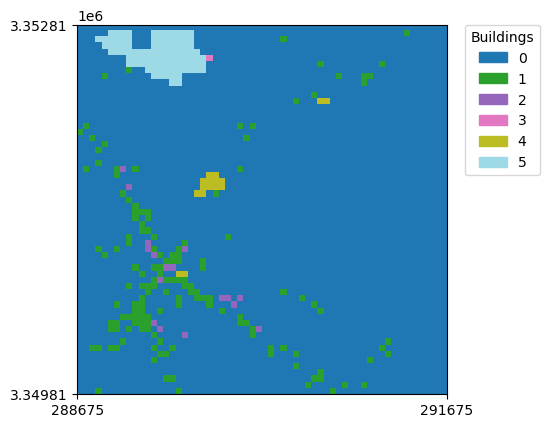

In [15]:
plot(Buildings)

In [16]:
aguila(Buildings)

Now we have read `buildg.map` from disk and can refer to it with the variable `Buildings`.
There are different ways to visualise the map:
* In Python we can use the `aguila` operator: `aguila(Buildings)`
* At the command prompt we can use the `Aguila` command with the file name: `aguila buildg.map`
* Use Python plotting tools that also work with Jupyter notebooks on Binder etc.

We're going to use the last option in this Jupyter notebook. But you can try the other ones too if you run this notebook locally.

We can use the `plot` operator to visualise PCRaster maps. It has the following syntax:

```Python
plot(raster, labels=None, title=None, filename=None)
```

The inputs are:

`raster`: Raster map with type of either Boolean, Nominal, Scalar, or Ldd.

`labels`: Optional. Dictionary of labels that should be used for the legend, cell values will be used otherwise.

`title`: Optional. Legend title as string, tries to identify the variable name otherwise.

`filename`: Optional. If provided plot will be written to disk.

Raster data has no attribute table. The values in the `Buildings` raster represent the following classes:

| Value | Class |
|:-------:|:-------:|
| 0 | None |
| 1 | House |
| 2 | Public building |
| 3 | Landfill |
| 4 | Industry |
| 5 | Mine |

We can save the legend in a Python dictionary:

In [17]:
Legend = {0:"None",1:"House",2:"Public building",3:"Landfill",4:"Industry",5:"Mine"}

We can now plot the Buildings layer by executing this code:

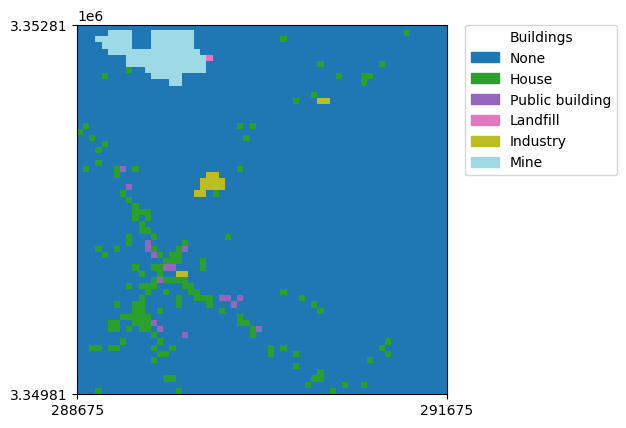

In [18]:
plot(Buildings, labels=Legend, title="Buildings", filename=None)


We first need to create a boolean layer with True for houses and False for other buildings.

In [19]:
Houses = Buildings == 1

Here we have used the `==` operator. This creates a boolean map with value 1 for all cells that are equal to 1 and 0 for all other cells. Here you can find more info about [operators in PCRaster](https://pcraster.geo.uu.nl/pcraster/4.3.0/documentation/python/quickstart.html#operators).
Let's visualise the result with the `plot` operator:

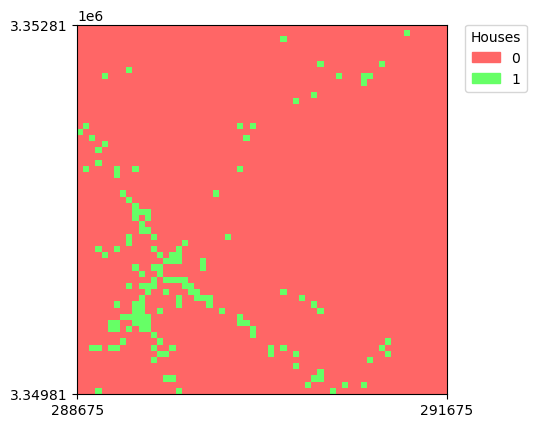

In [20]:
plot(Houses)

## 3.3 Create Zones of 150 Meters Around the Houses
The next step is to create zones of 150 m around the houses.

We can use the [`spreadmaxzone` function](https://pcraster.geo.uu.nl/pcraster/4.3.0/documentation/pcraster_manual/sphinx/op_spreadmaxzone.html).

The syntax is `Result = spreadmaxzone(points, initialfrictiondist, friction, max_distance)`
In our case `points` are the `Houses`, `initialfrictiondist = 0`, `friction = 1` and `max_distance = 150`. `intialfrictiondistance = 0` means that their is no friction at the location of the houses an with `friction = 1` we calculate the distance from other pixels in an equal way without different weights.

In [21]:
houses150m = spreadmaxzone(Houses, 0, 1, 150)

Visualise the result.

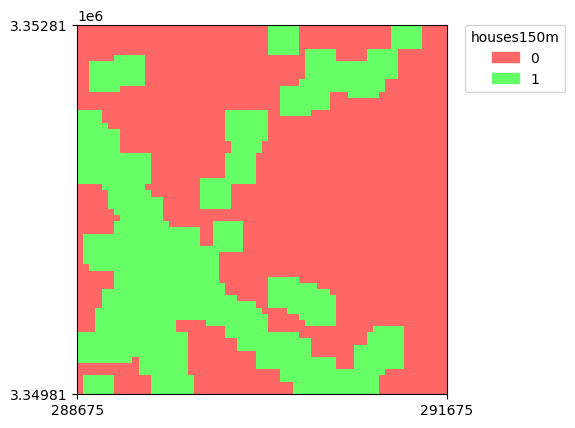

In [22]:
plot(houses150m)

We can save this result to disk using the `report` function. The first argument is the variable name of the map that you want to write to disk. The second argument is the string of the file name.

In [24]:
report(houses150m,"fhouses150m.map")

In [26]:
Hosues_150b = readmap("fhouses150m.map")
aguila(Hosues_150b)

If you run this notebook locally, verify that `houses150m.map` is stored in the `data` folder and visualise the result by using aguila from the command prompt:
```
aguila houses150.map
```

## 3.4 Create Zones of 150 Meters Around the Roads
In a similar way we can now calculate the 150 m buffer around the roads.

The values in `roads.map` represent the following classes:

| Value | Class |
|:-------:|:-------:|
| 0 | No road |
| 1 | Dirt road |
| 2 | Tarmac |

Do the same steps as for `houses150m` and save the result to `roads150m.map`.

In [27]:
Roads = readmap("froads.map")
Roads = nominal(Roads)

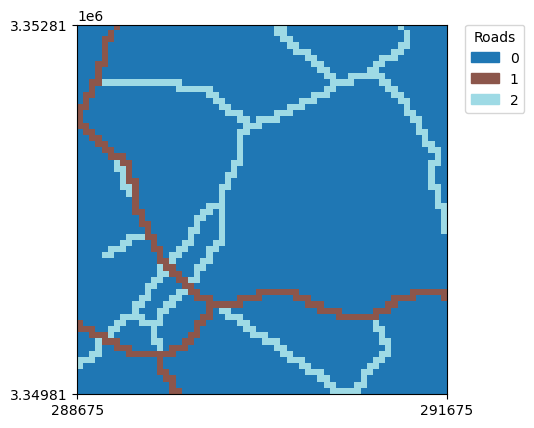

In [28]:
plot(Roads)

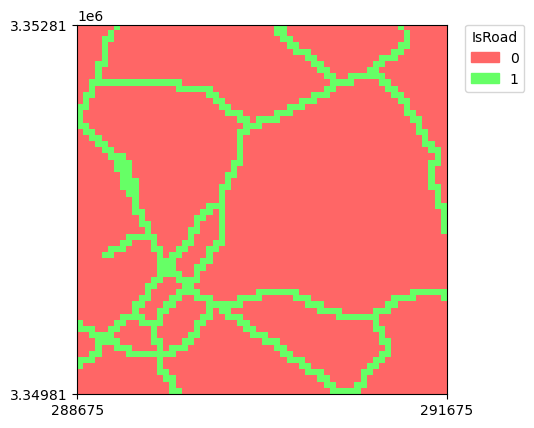

In [29]:
IsRoad = Roads != 0
plot(IsRoad)

In [31]:
froads150m = spreadmaxzone(IsRoad,0,1,150)


Visualise the result.

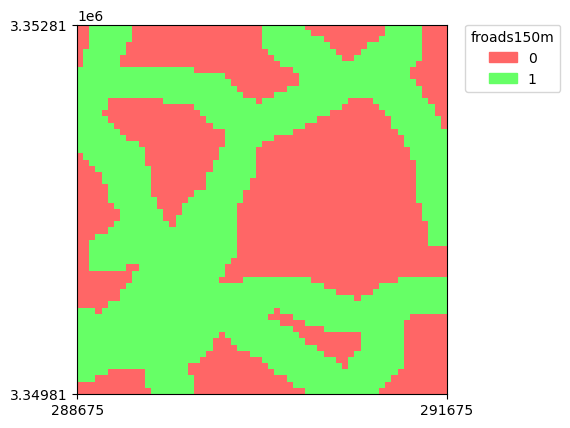

In [32]:
plot(froads150m)

Save the result to disk with the name `roads150m.map`.

In [33]:
report(froads150m,"froads150m.map")

<!--NAVIGATION-->
< [Preparation](Preparation.ipynb) | [Contents](Contents.ipynb) | [Condition 2](Condition_2.ipynb) >